
###**Dog Breed Classification : Tuning and Optimization Implementation**
<br>



####**Neural Network Model Used:**

```
Convolutional Neural Network

```


####**Hyperparameter Optimization Used:**


1.   Grid Search
2.   Random Search




#####**Step 1**
The Libraries imported in this step are from the previous activity and our group added additional libraries for the implementation of Grid Search and Random Search. The additional libraries are the following:

*   RandomizedSearchCV
*   GridSeachCV

The **Matplotlib** is the library imported for data visualization and graphical plotting library for Python.

The **Tensorflow** is the library imported to slew of machine learning and deep learning (aka neural networking) models and algorithms and makes them useful by way of a common metaphorfor graphing package for Python.






In [ ]:
#KERAS
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D 
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

img_rows, img_cols = 50,50
img_channels = 1

from google.colab import drive
drive.mount('/content/gdrive')

# Added Libraries for GridSearch and RandomizedSearch
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Step 2:**<br>
In this step, The group setup directory for raw and resized data. The path 1 contains the "input_data", this is where you get the samples datas or raw data that you will going to use. The path 2 contains the "resized_data", this is where you will import or store all the processed data that you used.

In [ ]:
path1 = "/content/gdrive/My Drive/Colab Notebooks/input_data"
path2 = "/content/gdrive/My Drive/Colab Notebooks/resized_data"
print("Directory path is set")

#In this line, the path 1 contain the input data or the collected images we will use for our final project and in path 2 for the processed data

Directory path is set


**Step 3:** <br>
In this step, the raw images are stored in input directory

*   The variable listing is used to keep the raw data from your input data.
*   num samples is a variable that counts the number of samples in your data.

The total number of raw images or the collected images of our group is 339.





In [ ]:
listing = os.listdir(path1)
num_samples=size(listing)
print("Total number of raw images is {}".format(num_samples))

#In display how many images in our path1(input_data folder)

Total number of raw images is 339


**Step 4:**<br>
In this step, Resizing of images and converting it to grayscale happens. The conversion of data size and color where the data has been gray scaled and resized is done in this code cell. The data will be stored in the opposite path after it has been resized and grayscaled.

In [ ]:
for file in listing:
    im = Image.open(path1 +'/' + file)
    img = im.resize((img_rows, img_cols))
    gray = img.convert('L')
              #need to do some more processing here
    gray.save(path2 + '/' + file, "JPEG")

imlist = os.listdir(path2)
num_procs=size(imlist)
print("Raw images converted to following filenames {}".format(imlist))
print("Total number of raw images is {}".format(num_procs))

#In this line, the images processing happen here, it convert the input data to grey scale and resizing the images.

Raw images converted to following filenames ['shih_007.jpeg', 'shih_001.jpg', 'shih_002.jpeg', 'shih_005.jpeg', 'shih_011.jpeg', 'shih_003.jpeg', 'shih_010.jpg', 'shih_012.jpg', 'shih_006.jpeg', 'shih_008.jpg', 'shih_004.jpeg', 'shih_009.jpg', 'shih_016.jpeg', 'shih_017.jpeg', 'shih_014.jpeg', 'shih_012.jpeg', 'shih_013.jpeg', 'shih_015.jpg', 'shih_018.jpeg', 'shih_020.jpg', 'shih_021.jpeg', 'shih_022.jpg', 'shih_025.jpeg', 'shih_023.jpg', 'shih_024.jpg', 'shih_026.jpg', 'shih_027.jpg', 'shih_028.jpeg', 'shih_029.jpeg', 'shih_031.jpeg', 'shih_030.jpeg', 'shih_032.jpeg', 'shih_033.jpeg', 'shih_034.jpg', 'shih_035.jpeg', 'shih_037.jpeg', 'shih_036.jpeg', 'shih_039.jpg', 'shih_038.jpeg', 'shih_040.jpeg', 'shih_041.jpg', 'shih_042.jpeg', 'shih_044.jpeg', 'shih_043.jpeg', 'shih_045.jpg', 'shih_046.jpg', 'shih_047.jpg', 'shih_048.jpg', 'shih_050.jpg', 'shih_051.jpeg', 'shih_049.jpg', 'shih_052.jpeg', 'shih_053.jpeg', 'shih_054.jpg', 'shih_056.jpg', 'shih_055.jpg', 'shih_057.jpg', 'shih_059.j

**Step 5:**<br>
In this step, It checks the number of resized image for use as input. On the first line of the code, we open the photos from their path base, then get the size of the images and assign it, then get the total number of all images using len(imlist), and then print the total number of the processed images from the dataset.

In [ ]:
im1 = array(Image.open(path2 + '/' + imlist[0]))

m,n = im1.shape[0:2]
imnbr = len(imlist)

print(imnbr)
print("Total number of processed images is {}".format(imnbr))
print("Size of images is {}x{}".format(m,n))

#In this line, it shows the number of processed image and the size of each images.

339
Total number of processed images is 339
Size of images is 50x50


**Step 6:**<br>
In this step, We'll retrieve the shape of the matrix in this phase, then we'll use the method flatten() to flatten it into one dimension. Then print the matrix shape's number. 
We assign labels to each sample after printing it, and we print the total number of samples that have been labeled.

*   The first label, it contains the dog category: **Chihuahua**
*   The second label, it contains the dog category: **labrador**
*   The second label, it contains the dog category: **Shih zhu**





In [ ]:
immatrix = array([array(Image.open(path2 + '/' + im2)).flatten() for im2 in imlist], 'f')

print("Matrix shape is {}".format(immatrix.shape))
print(immatrix)

label = np.ones((num_samples,),dtype = int)
label[:106] = 0 #chihuahua
label[106:220] = 1 #labrador
label[220:] = 2 #shih zhu

print("Label shape is {}".format(label.shape))
print(label)

#In this line, labeling each categories of images do here. In our collected images for our final project it contains 3 categories of dogs: chihuahua, labrador, and shih tzu

Matrix shape is (339, 2500)
[[  0.   0.   0. ...  24.  25.  25.]
 [ 95.  96. 101. ... 146. 144. 144.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [  4.   5.   6. ...   0.   0.   0.]
 [242. 231. 234. ... 100.  77.  72.]]
Label shape is (339,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]


**Step 7:**<br>
In this step, Attaching labels to data matrix. The code shuffle all of the data from the dataset and reshape it with the line code img=immatrix[67].reshape(img rows, img cols), as well as convert the photographs to grayscale with the function cmap='gray' and print the train data in this step.

[array([[210., 203., 187., ...,  82.,  82.,  77.],
       [167., 167., 166., ..., 208., 205., 204.],
       [ 69.,  74.,  58., ..., 226., 228., 227.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [140.,  84., 134., ...,  42.,  52.,  54.]], dtype=float32), array([1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1,
       2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2,
       2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 2, 0, 2,
       0, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1,
       2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2,
       2, 1, 

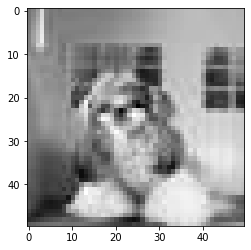

In [ ]:
data, Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

img = immatrix[67].reshape(img_rows, img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print(train_data)

#Using the shuffle function, it display random images.

**Step 8:** <br>Generate training and testing data. 
We split the dataset and train the data from it, dividing it by the total number of images in the dataset, before printing the train sample and test sample results.



In [ ]:
(X,y) = (train_data[0], train_data[1])
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('X_train :', X_train)
print('y_train :', y_train)
print('X_test :', X_test)
print('y_test :', y_test)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype("float32")

X_train /=255
X_test /=255

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

#In this step, splitting of traing and testing happen here.

[[210. 203. 187. ...  82.  82.  77.]
 [167. 167. 166. ... 208. 205. 204.]
 [ 69.  74.  58. ... 226. 228. 227.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [140.  84. 134. ...  42.  52.  54.]]
[1 2 2 0 1 0 0 0 1 2 1 0 0 2 0 2 2 2 0 1 0 2 2 1 2 0 2 0 2 2 1 0 1 2 0 1 0
 0 1 2 2 0 1 1 2 1 1 2 2 1 2 1 0 2 1 0 2 0 2 1 0 0 2 0 1 2 2 2 1 2 0 1 2 1
 1 0 0 2 0 1 1 0 1 1 0 2 0 2 0 2 1 2 2 0 1 1 2 2 1 1 0 1 2 2 0 0 2 0 1 1 2
 1 0 2 1 1 2 1 0 2 0 2 1 0 0 1 1 1 2 2 0 2 2 0 0 0 1 1 0 1 2 1 0 1 2 1 2 1
 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 2 1 2 2 1 2 2 1 0 2 2 1 1 0 0 2 0 1 2 2 2 2
 0 0 2 1 0 1 1 1 1 0 2 2 2 2 1 1 0 1 1 2 2 1 0 2 2 2 2 1 2 0 2 1 2 2 1 0 2
 2 2 0 2 2 0 1 0 2 2 1 2 1 0 2 1 1 2 1 2 0 0 0 1 2 0 0 0 2 0 1 1 1 2 1 2 2
 1 1 0 1 1 2 1 1 0 2 2 2 0 1 0 0 2 0 0 0 2 1 0 1 2 0 0 0 0 0 2 1 0 2 2 2 2
 1 2 0 1 2 1 0 2 0 0 0 1 1 2 1 0 2 0 0 0 0 2 0 1 1 2 1 1 1 2 2 0 1 2 0 1 2
 0 2 0 0 0 1]
X_train : [[246. 239. 238. ... 121. 117. 117.]
 [123. 130. 139. ... 146. 140. 139.]

**Step 9:**<br>
In this step, It display the labels of it's images. The number of classes we have is 3

[1 2 1 1 1 1 1 0 0 0 2 0 2 1 1 1 2 0 1 2 1 1 2 1 2 0 0 1 2 0 0 2 0 2 0 1 1
 0 2 2 1 2 1 2 1 2 2 2 2 2 1 0 0 0 1 2 0 2 2 2 0 0 2 2 1 0 2 1 1 2 2 2 1 2
 0 0 2 1 1 0 2 0 1 1 1 0 2 1 0 1 2 0 0 0 0 0 2 2 2 2 1 1 2 2 0 1 2 1 1 1 2
 1 2 2 2 0 1 2 0 2 1 2 0 0 0 1 2 1 1 0 0 0 2 2 2 0 0 2 1 1 0 1 0 0 2 1 1 0
 0 1 2 1 1 0 2 0 1 0 0 2 1 2 1 1 1 2 1 0 1 2 0 0 1 1 2 1 0 0 0 2 0 2 1 2 1
 1 0 2 0 2 2 0 2 1 2 2 2 1 2 0 0 0 0 0 1 1 2 2 2 1 0 1 2 1 2 1 1 2 2 2 2 1
 1 2 2 1 1 0 2 1 2 1 1 2 2 1 1 0 0 1 0 1 0 2 1 1 1 0 0 2 0 0 2 2 1 0 1 2 2
 1 0 0 1 1 1 2 0 2 2 1 1]
[2 2 2 1 0 1 1 0 2 2 0 2 2 0 2 0 0 0 1 0 2 2 2 1 2 0 2 1 0 1 1 0 2 1 0 1 0
 0 1 1 2 0 0 0 0 1 2 2 0 2 1 2 1 0 2 0 1 2 0 1 0 0 0 2 0 1 2 0]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.

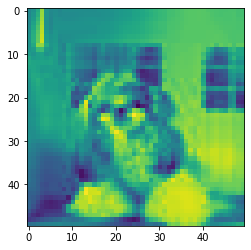

In [ ]:
print(y_train)
print(y_test)
nb_classes = 3
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print(Y_train)
print(Y_test)

i = 10
img = immatrix[67].reshape(img_rows, img_cols)
plt.imshow(img)
print("label of this image is:", Y_train[i,:])


**Step 10:**<br>
In this step, The group build the model that will be use for the the implementation of Grid Search and Random Search. The model are from the previous activity. **The Convolutional Neural Network Model.**


In [ ]:
#Creating CNN Model
def cnn_model(optimizer):
  nb_filters = 32
  nb_pool = 2
  nb_conv = 3

  model = tf.keras.Sequential()

  model.add(Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=(img_rows, img_cols, 1))) #, activation = 'relu', data_format=('channels_first))
  convout1 = Activation('relu')
  model.add(convout1)
  model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
  convout2 = Activation('relu')
  model.add(convout2)
  model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(128))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nb_classes))
  model.add(Activation('softmax'))

  model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
  return model


**Step 11:**<br>
In this step, the group implement the **Grid Search**. Using the **GridSearchCV**, it helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters.

> It takes 30 minutes to execute this line because the group used 3 parameters for grid search. this are the batch size, epochs and optimizer.






In [ ]:
#Grid Search

model = KerasClassifier(build_fn=cnn_model)

parameters = {'batch_size': [10, 20, 30, 50, 70, 100, 150], 'epochs': [5, 10, 20], 
              'optimizer': ['Adam', 'Adadelta', 'Adamax', 'Nadam', 'SGC', 'Adagrad', 'RMSprop']}
grid = GridSearchCV(model, parameters)
grid.fit(X_train, Y_train)

print("\nThe best estimator across all search=:\n", grid.best_estimator_)
print("\nThe best score across all search=:\n", grid.best_score_)
print("\nThe best estimator across all search=:\n", grid.best_params_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 18ms/step - loss: 1.0972 - accuracy: 0.3733
Epoch 20/20
1/1 [==============================] - 0s 157ms/step - loss: 1.0904 - accuracy: 0.3519
Epoch 1/20
4/4 [==============================] - 1s 19ms/step - loss: 1.1316 - accuracy: 0.2917
Epoch 2/20
4/4 [==============================] - 0s 20ms/step - loss: 1.1017 - accuracy: 0.3287
Epoch 3/20
4/4 [==============================] - 0s 21ms/step - loss: 1.0968 - accuracy: 0.3519
Epoch 4/20
4/4 [==============================] - 0s 24ms/step - loss: 1.1125 - accuracy: 0.2870
Epoch 5/20
4/4 [==============================] - 0s 24ms/step - loss: 1.1000 - accuracy: 0.3426
Epoch 6/20
4/4 [==============================] - 0s 19ms/step - loss: 1.1070 - accuracy: 0.2963
Epoch 7/20
4/4 [==============================] - 0s 21ms/step - loss: 1.0931 - accuracy: 0.4259
Epoch 8/20
4/4 [==============================] - 0s 22ms/step - loss: 1.0872 - accur

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
105 fits failed out of a total of 735.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 232, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.b

28/28 [==============================] - 1s 7ms/step - loss: 1.1071 - accuracy: 0.3284
Epoch 2/20
28/28 [==============================] - 0s 6ms/step - loss: 1.1029 - accuracy: 0.3395
Epoch 3/20
28/28 [==============================] - 0s 7ms/step - loss: 1.0938 - accuracy: 0.4059
Epoch 4/20
28/28 [==============================] - 0s 7ms/step - loss: 1.0941 - accuracy: 0.3764
Epoch 5/20
28/28 [==============================] - 0s 6ms/step - loss: 1.1015 - accuracy: 0.3948
Epoch 6/20
28/28 [==============================] - 0s 6ms/step - loss: 1.0839 - accuracy: 0.3838
Epoch 7/20
28/28 [==============================] - 0s 6ms/step - loss: 1.0645 - accuracy: 0.3911
Epoch 8/20
28/28 [==============================] - 0s 6ms/step - loss: 1.0608 - accuracy: 0.4170
Epoch 9/20
28/28 [==============================] - 0s 6ms/step - loss: 1.0368 - accuracy: 0.4797
Epoch 10/20
28/28 [==============================] - 0s 6ms/step - loss: 1.0253 - accuracy: 0.4613
Epoch 11/20
28/28 [===========

**Step 12:** <br>
In this step, the group implement the **Random Search**. Using the **RandomizedSearchCV**, it has two methods: "fit" and "score." If the estimator supports them, it also implements "score samples," "predict," "predict proba," "decision function," "transform," and "inverse transform."

In [ ]:
#Randomized Search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist={"max_depth": [3,5],
            "max_feature": sp_randint(1,11),
            "min_samples_split": sp_randint(2,11),
            "min_samples_leaf": sp_randint(1,11),
            "bootstrap":[True, False]
}

n_iter_search= 20

random_search = RandomizedSearchCV(model, param_distributions=param_dist,n_iter=n_iter_search)

print("\n The best estimator across ALL searched params:\n", grid.best_estimator_) 
print("\n The best score across ALL searched params:\n", grid.best_score_) 
print("\n The best parameters across ALL searched params:\n", grid.best_params_)


 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.49824915528297425

 The best parameters across ALL searched params:
 {'batch_size': 10, 'epochs': 20, 'optimizer': 'Nadam'}


**Step 13:** <br>
In this step, The group build the Convolutional Neural Network Model, and adjust the parameters for the experimentation.
> Building the neural network entails configuring the model's layers and then compiling the model. The layer is the basic building block of a neural network. Layers create representations from the data that is fed into them. Before the model can be compiled, the neural network layers must be configured. A neural network's layer is its most fundamental component. Data is organized into layers, from which representations are extracted.

> Compile the model Before the model is ready for training, a few more settings must be applied. These are added during the compile step of the model. Assemble the model. Before the model can be used for training, a few more parameters must be specified. These are added during the model's compile step..


In [ ]:
nb_filters = 32
nb_pool = 2
nb_conv = 3

batch_Size = 20
nb_classes = 3
nb_epoch = 10

model = tf.keras.Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv, input_shape=(img_rows, img_cols, 1))) #, activation = 'relu', data_format=('channels_first))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1048"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2096 (Conv2D)        (None, 16, 16, 32)        320       
                                                                 
 activation_4192 (Activation  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2097 (Conv2D)        (None, 5, 5, 32)          9248      
                                                                 
 activation_4193 (Activation  (None, 5, 5, 32)         0         
 )                                                               
                                                                 
 max_pooling2d_1048 (MaxPool  (None, 2, 2, 32)         0         
 ing2D)                                                          
                                                   

**Step 14:**<br>
In tihs step, The model was trained and collect training data

>1.Provide the model with the training data. In this example, the training data is stored in the train images and train labels arrays.

>2.The model detects associations between images and labels.

>3.In this case, you direct the structure to make predictions about a test set, such as the test images array.

>4.Confirm to see if the estimations fit the labels in the test labels array.

In [ ]:
hist = model.fit(X_train, Y_train, batch_size=size(batch_Size), epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
271/271 [==============================] - 2s 4ms/step - loss: 1.1198 - accuracy: 0.3284 - val_loss: 1.1041 - val_accuracy: 0.3824
Epoch 2/10
271/271 [==============================] - 1s 3ms/step - loss: 1.1017 - accuracy: 0.3506 - val_loss: 1.1026 - val_accuracy: 0.3382
Epoch 3/10
271/271 [==============================] - 1s 3ms/step - loss: 1.1026 - accuracy: 0.3911 - val_loss: 1.1051 - val_accuracy: 0.3382
Epoch 4/10
271/271 [==============================] - 1s 4ms/step - loss: 1.1014 - accuracy: 0.3469 - val_loss: 1.1071 - val_accuracy: 0.3382
Epoch 5/10
271/271 [==============================] - 1s 3ms/step - loss: 1.0968 - accuracy: 0.3985 - val_loss: 1.1003 - val_accuracy: 0.2794
Epoch 6/10
271/271 [==============================] - 1s 3ms/step - loss: 1.0832 - accuracy: 0.3616 - val_loss: 1.0619 - val_accuracy: 0.5147
Epoch 7/10
271/271 [==============================] - 1s 4ms/step - loss: 1.0776 - accuracy: 0.4502 - val_loss: 1.1174 - val_accuracy: 0.3088
Epoch 

**Step 15:**<br>
In this step, The loss and accuracy metrics are displayed as the model trains. The model trains represent the loss and accuracy data.

In [ ]:
  score = model.evaluate(X_test, Y_test, verbose=0)
  print(model.metrics)
  print(score)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  print(Y_test)
  Y_pred = model.predict(X_test)
  print(Y_pred)
  y_pred = np.argmax(Y_pred, axis=1)
  print(y_pred)
  target_names = ['class 0(Chihuahua)', 'class 1(Labrador)', 'class 2(Shih tzu)']
  print("Performance report: \n", classification_report(np.argmax(Y_test,axis=1), y_pred, target_names=target_names))
  print("Confusion Matrix: \n", confusion_matrix(np.argmax(Y_test, axis=1), y_pred))


[<keras.metrics.Mean object at 0x7faf72189990>, <keras.metrics.MeanMetricWrapper object at 0x7faf6feff990>]
[1.0730267763137817, 0.45588234066963196]
Test loss: 1.0730267763137817
Test accuracy: 0.45588234066963196
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 

***Summary of Overall Performance:***
##### Confusion Matrix
1.   Based on the observation there are 14 negative in the records and predicted it correctly.
2.    Based on the obesevation there is 6 negative in the record but predicted as positive.
3.    Based on the obesevation there is 7 negative in the record but predicted as correctly
4.   Based on the observation there are 3 negative in the records and predicted it correctly.
5. Based on the obeservation there are 8 positive in the record and predicted it correctly.
6. Based on the obeservation there are 7 positive in the record and predicted it correctly.
7. Based on the observation there are 6 negative in the records and predicted it correctly
8.  Based on the obeservation there are 8 positive in the record and predicted it correctly.
9. Based on the obeservation there are 9 positive in the record and predicted it correctly.


